In [211]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

matplotlib.style.use('ggplot')

In [212]:
def drawLine(model, X_test, y_test, title):
    # Hàm vẽ biểu đồ hồi quy khi X_test có 1 đặc trưng
    # và hiển thị hệ số R2
    y_pred = model.predict(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, y_pred, color='orange', linewidth=1, alpha=0.7)
    ax.set_xlabel(feature)
    ax.set_ylabel('Accept')

    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [213]:
def drawPlane(model, X_test, y_test, title):
    # Hàm vẽ biểu đồ hồi quy khi X_test có 2 đặc trưng
    # và hiển thị hệ số R2
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # Chuyển về numpy vì X_test có thể là DataFrame, v.v.
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Lấy giá trị nhỏ nhất và lớn nhất của 2 đặc trưng
    # để vẽ siêu mặt phẳng   
    # do điểm nhỏ nhất và lớn nhất sẽ bao bọc toàn bộ dữ liệu
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Dự đoán để lấy siêu mặt phẳng
    z = model.predict(np.c_[x.ravel(), y.ravel()])
    z = z.reshape(x.shape)

    # Trực quan hóa dữ liệu và vẽ siêu mặt phẳng
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

# Task 1: Đọc dữ liệu từ tập dữ liệu College

In [214]:
df = pd.read_csv('College.csv', index_col = 0)
df

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

# Task 2: Mã hóa hạng mục

In [215]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})
df

Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University          1   1660    1232     721         23   
Adelphi University                    1   2186    1924     512         16   
Adrian College                        1   1428    1097     336         22   
Agnes Scott College                   1    417     349     137         60   
Alaska Pacific University             1    193     146      55         16   
...                                 ...    ...     ...     ...        ...   
Worcester State College               0   2197    1515     543          4   
Xavier University                     1   1959    1805     695         24   
Xavier University of Louisiana        1   2097    1915     695         34   
Yale University                       1  10705    2453    1317         95   
York College of Pennsylvania          1   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University           52         2885          537      7440   
Adelphi University                     29         2683         1227     12280   
Adrian College                         50         1036           99     11250   
Agnes Scott College                    89          510           63     12960   
Alaska Pacific University              44          249          869      7560   
...                                   ...          ...          ...       ...   
Worcester State College                26         3089         2029      6797   
Xavier University                      47         2849         1107     11520   
Xavier University of Louisiana         61         2793          166      6900   
Yale University                        99         5217           83     19840   
York College of Pennsylvania           63         2988         1726      4990   

                                Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University          3300    450      2200   70        78   
Adelphi University                    6450    750      1500   29        30   
Adrian College                        3750    400      1165   53        66   
Agnes Scott College                   5450    450       875   92        97   
Alaska Pacific University             4120    800      1500   76        72   
...                                    ...    ...       ...  ...       ...   
Worcester State College               3900    500      1200   60        60   
Xavier University                     4960    600      1250   73        75   
Xavier University of Louisiana        4200    617       781   67        75   
Yale University                       6510    630      2115   96        96   
York College of Pennsylvania          3560    500      1250   75        75   

                                S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University         18.1           12    7041         60  
Adelphi University                   12.2           16   10527         56  
Adrian College                       12.9           30    8735         54  
Agnes Scott College                   7.7           37   19016         59  
Alaska Pacific University            11.9            2   10922         15  
...                                   ...          ...     ...        ...  
Worcester State College              21.0           14    4469         40  
Xavier University                    13.3           31    9189         83  
Xavier University of Louisiana       14.4           20    8323         49  
Yale University                       5.8           49   40386         99  
York College of Pennsylvania         18.1           28    4509         99  

[777 rows x 18 columns]

# Task 3: Trực quan ma trận tương quan

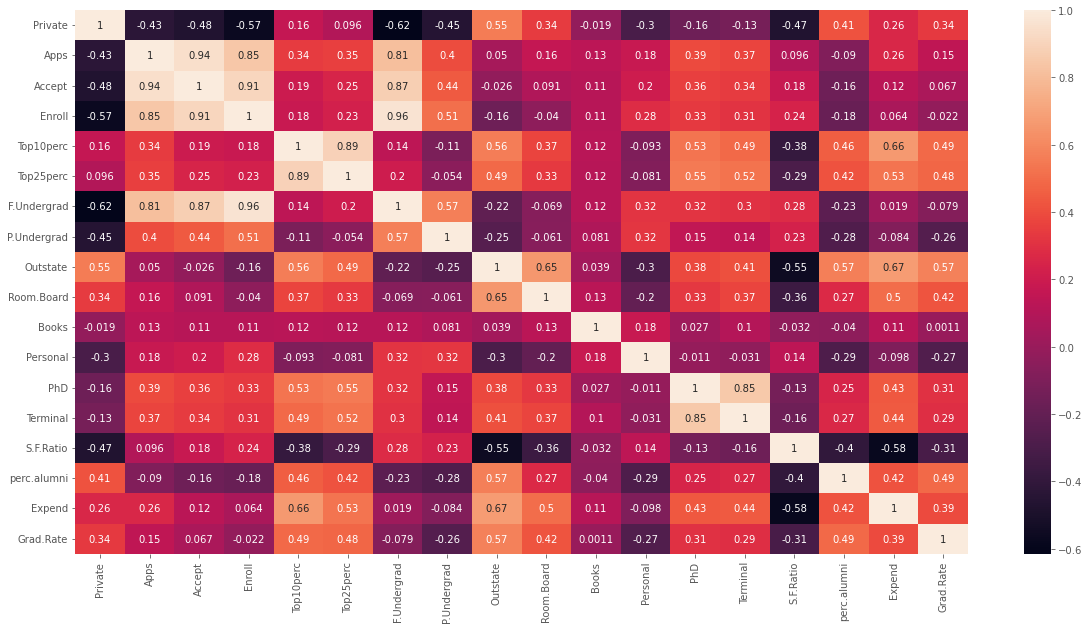

In [216]:
plt.figure(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Task 4: Vẽ biểu đồ Scatter từng đặc trưng với mục tiêu

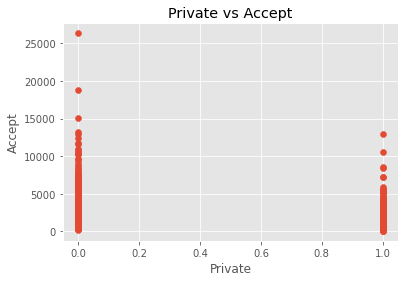

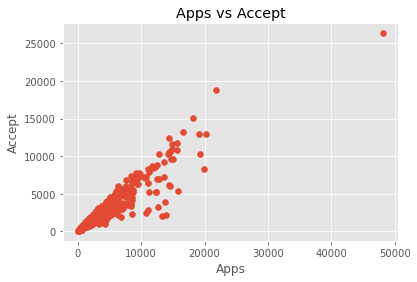

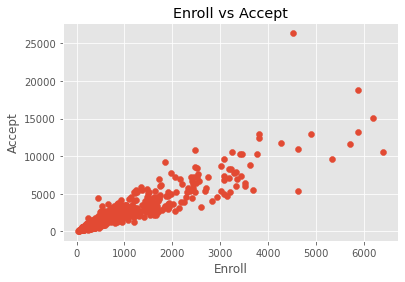

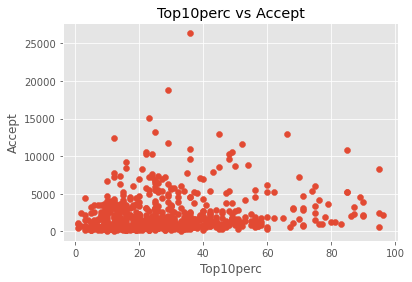

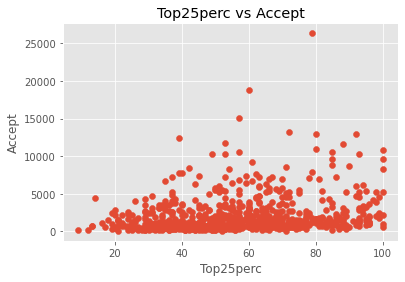

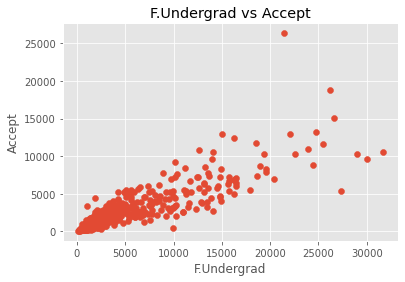

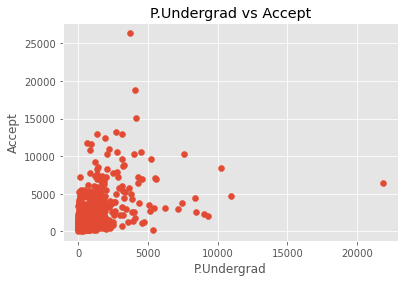

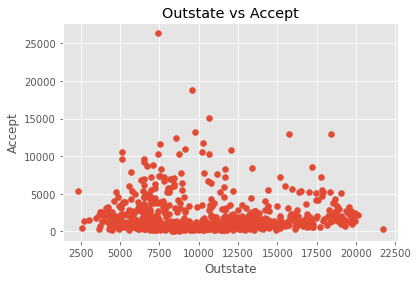

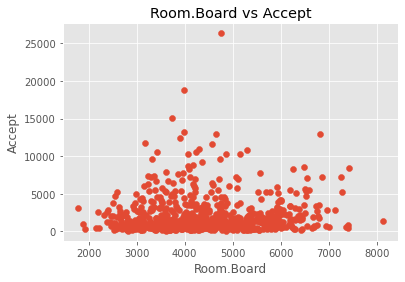

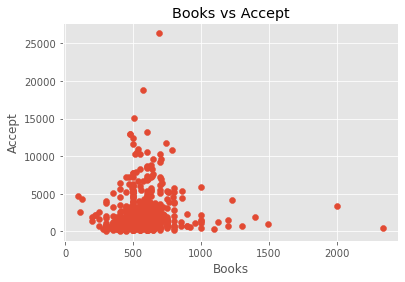

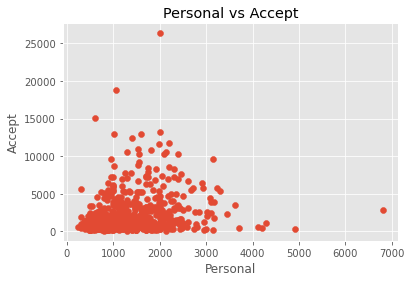

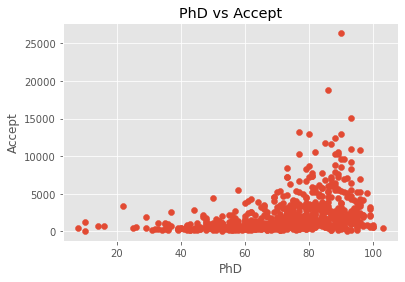

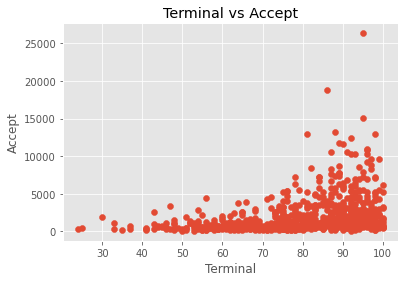

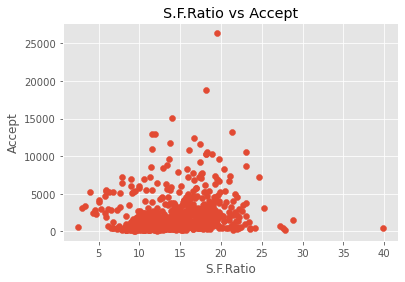

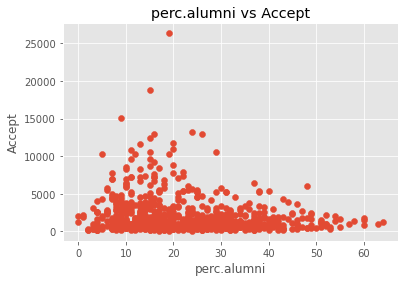

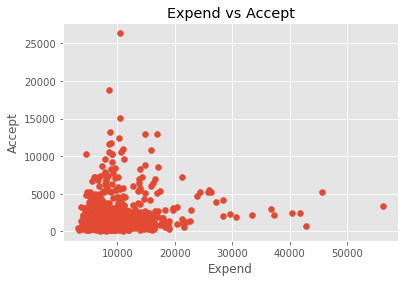

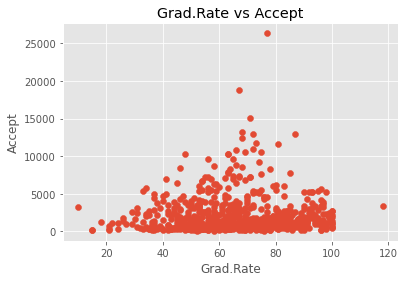

In [217]:
for i in df.drop(columns='Accept').columns.tolist():
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[i], df['Accept'])
    ax.set_xlabel(i)
    ax.set_ylabel('Accept')
    ax.set_title('{} vs Accept'.format(i))
    plt.show()

# Task 5: Phân tách dữ liệu đặc trưng vào X, dữ liệu mục tiêu vào y từ dữ liệu gốc

In [218]:
X = df.drop(columns='Accept')
y = df.Accept

X.head()

Private  Apps  Enroll  Top10perc  Top25perc  \
Abilene Christian University        1  1660     721         23         52   
Adelphi University                  1  2186     512         16         29   
Adrian College                      1  1428     336         22         50   
Agnes Scott College                 1   417     137         60         89   
Alaska Pacific University           1   193      55         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University             249          869      7560        4120   

                              Books  Personal  PhD  Terminal  S.F.Ratio  \
Abilene Christian University    450      2200   70        78       18.1   
Adelphi University              750      1500   29        30       12.2   
Adrian College                  400      1165   53        66       12.9   
Agnes Scott College             450       875   92        97        7.7   
Alaska Pacific University       800      1500   76        72       11.9   

                              perc.alumni  Expend  Grad.Rate  
Abilene Christian University           12    7041         60  
Adelphi University                     16   10527         56  
Adrian College                         30    8735         54  
Agnes Scott College                    37   19016         59  
Alaska Pacific University               2   10922         15

In [219]:
y.head()

Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146
Name: Accept, dtype: int64

# Task 6: Tách dữ liệu thành train/test data

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

# Task 7: Mô hình hóa hồi quy tuyến tính chi phí ăn ở và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu chi phí ăn ở từ bộ train và test

In [221]:
X_train_rb = X_train['Room.Board']
X_test_rb = X_test['Room.Board']
y_train_rb = y_train
y_test_rb = y_test

Điều chỉnh shape dữ liệu phù hợp với đầu vào của mô hình

In [222]:
X_train_rb = np.array(X_train_rb).reshape(-1,1)
X_test_rb = np.array(X_test_rb).reshape(-1,1)
y_train_rb = np.array(y_train_rb).reshape(-1,1)
y_test_rb = np.array(y_test_rb).reshape(-1,1)

Xây dựng và huấn luyện mô hình

In [223]:
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(X_train_rb, y_train_rb)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [224]:
from sklearn.metrics import r2_score
score = r2_score(y_test_rb, model1.predict(X_test_rb))
score

-0.0026669864145500988

Trực quan mô hình hóa với dữ liệu test

R2: -0.0026669864145500988
Intercept(s):  [1340.61956519]


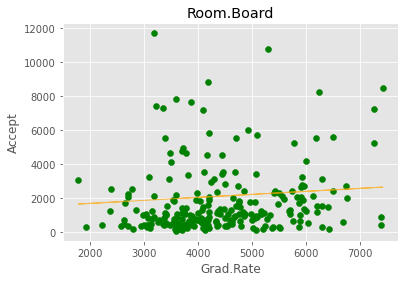

In [225]:
feature = 'Grad.Rate'
drawLine(model1, X_test_rb, y_test_rb, 'Room.Board')

# Task 8: Mô hình hóa hồi quy tuyến tính số lượng sinh viên ghi danh cho mỗi trường đại học và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh cho mỗi trường đại học ở từ bộ train và test

In [226]:
X_train_er = X_train['Enroll']
X_test_er = X_test['Enroll']
y_train_er = y_train
y_test_er = y_test

Điều chỉnh shape phù hợp với đầu vào của mô hình

In [227]:
X_train_er = np.array(X_train_er).reshape(-1,1)
X_test_er = np.array(X_test_er).reshape(-1,1)
y_train_er = np.array(y_train_er).reshape(-1,1)
y_test_er = np.array(y_test_er).reshape(-1,1)

Xây dựng và huấn luyện mô hình

In [228]:
model2 = linear_model.LinearRegression()
model2.fit(X_train_er, y_train_er)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [229]:
score = r2_score(y_test_er, model2.predict(X_test_er))
score

0.8578204867356156

Trực quan mô hình với dữ liệu test

R2: 0.8578204867356156
Intercept(s):  [151.72611242]


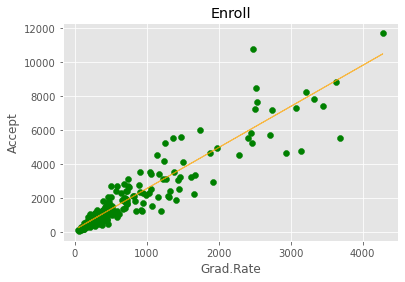

In [230]:
feature = 'Grad.Rate'
drawLine(model2, X_test_er, y_test_er, 'Enroll')

# Task 9: Mô hình hóa hồi quy tuyến tính từng đặc trưng với số lượng sinh viên được chấp nhận và trực quan hóa mô hình với dữ liệu test

R2: 0.22400751013309905
Intercept(s):  [4082.93421053]


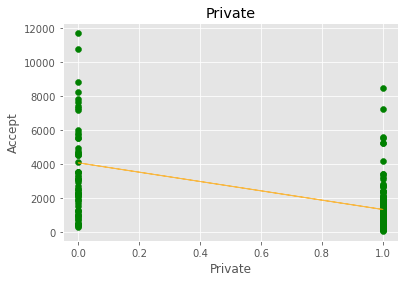

R2: 0.8278338672174985
Intercept(s):  [215.66921084]


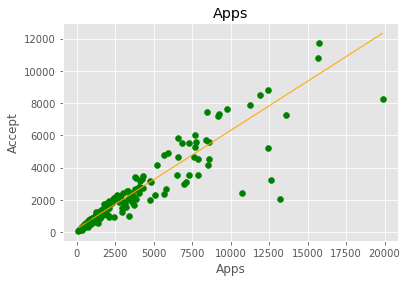

R2: 0.8578204867356156
Intercept(s):  [151.72611242]


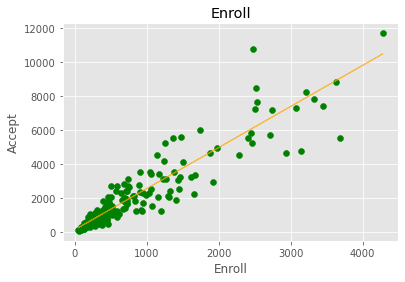

R2: 0.046531790535434436
Intercept(s):  [1397.3784276]


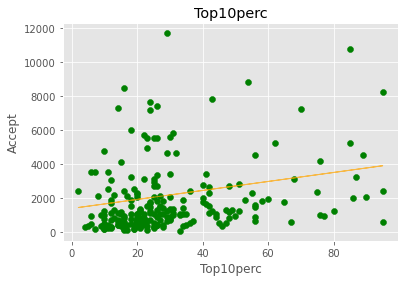

R2: 0.05631647635294579
Intercept(s):  [378.88468283]


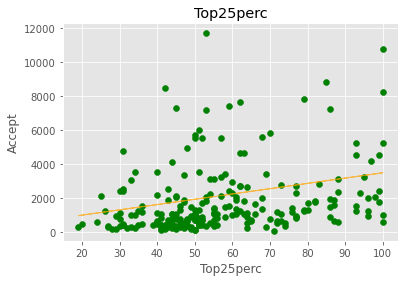

R2: 0.7779917973754006
Intercept(s):  [380.9429105]


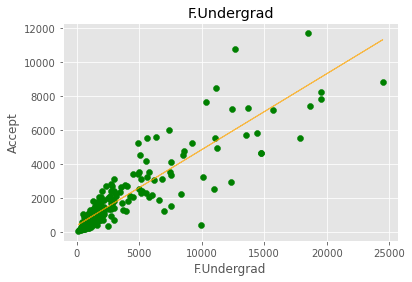

R2: 0.15365724454940077
Intercept(s):  [1444.34815175]


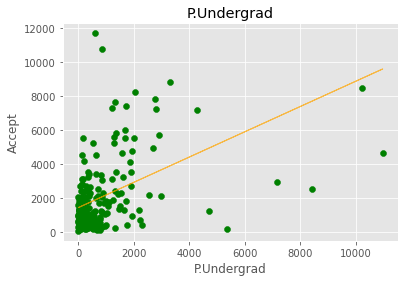

R2: -0.03441717957246193
Intercept(s):  [2472.29781157]


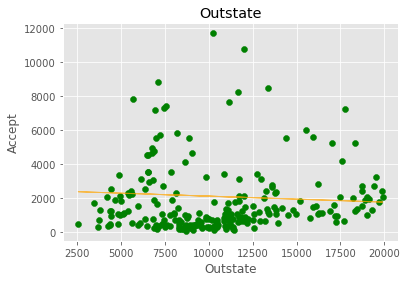

R2: -0.0026669864145500988
Intercept(s):  [1340.61956519]


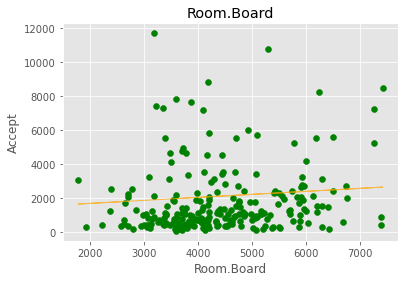

R2: 0.012015078321136241
Intercept(s):  [1304.83559562]


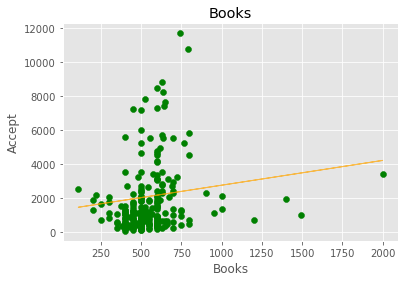

R2: 0.053082024881150325
Intercept(s):  [1185.97560794]


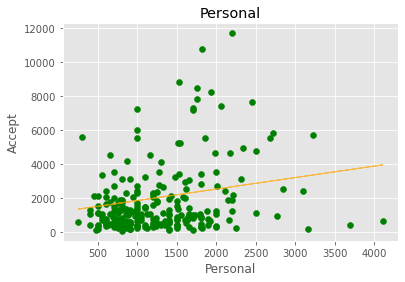

R2: 0.14442475831652213
Intercept(s):  [-1901.73568255]


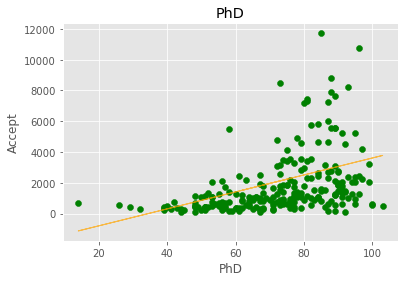

R2: 0.10721305445042717
Intercept(s):  [-2566.34112301]


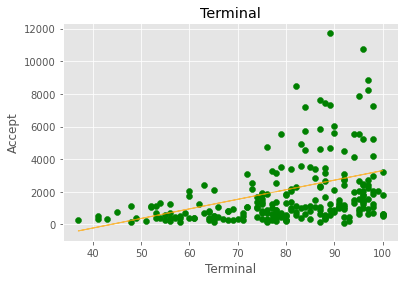

R2: -0.0012154874950456307
Intercept(s):  [406.08920302]


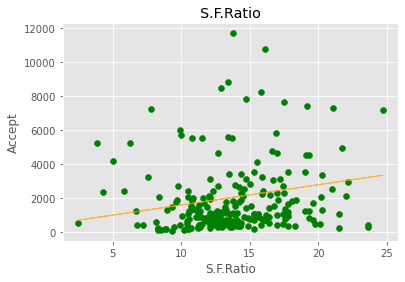

R2: 0.006075121043538134
Intercept(s):  [2869.31957079]


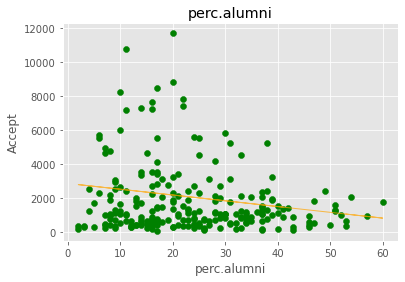

R2: 0.019419509650065114
Intercept(s):  [1652.51677722]


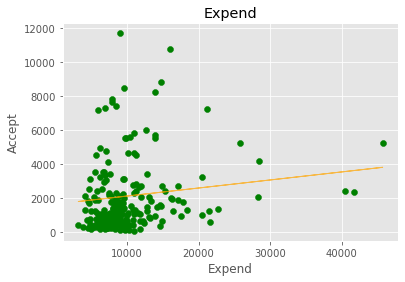

R2: -0.018954776268819362
Intercept(s):  [1407.49746019]


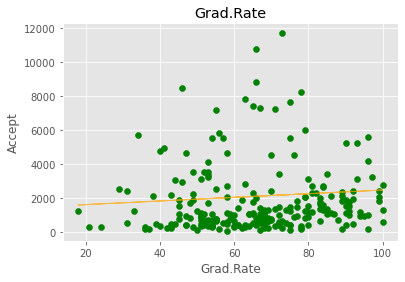

In [231]:
for i in list(X.columns):
    A = X_train[i]
    B = X_test[i]
    C = y_train
    D = y_test
    
    A = np.array(A).reshape(-1,1)
    B = np.array(B).reshape(-1,1)
    C = np.array(C).reshape(-1,1)
    D = np.array(D).reshape(-1,1)
    
    model_i = linear_model.LinearRegression()
    model_i = model_i.fit(A, C)
    score = r2_score(D, model_i.predict(B))
    feature = i
    drawLine(model_i, B, D, i)

# Task 10: Mô hình hóa hồi quy tuyến đa biến số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở để dự đoán số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở từ bộ train và test

In [232]:
X_train_erb = X_train[['Enroll','Room.Board']]
X_test_erb = X_test[['Enroll','Room.Board']]
y_train_erb = y_train
y_test_erb = y_test

Điều chỉnh shape phù hợp với đầu vào của mô hình

In [233]:
X_train_erb = np.array(X_train_erb).reshape(-1,2)
X_test_erb = np.array(X_test_erb).reshape(-1,2)
y_train_erb = np.array(y_train_erb).reshape(-1,1)
y_test_erb = np.array(y_test_erb).reshape(-1,1)

Xây dựng và huấn luyện mô hình

In [234]:
model3 = linear_model.LinearRegression()
model3 = model3.fit(X_train_erb, y_train_erb)

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [235]:
y_pred_erb = model3.predict(X_test_erb)
score = r2_score(y_test_erb, y_pred_erb)
score

0.8764371774214047

Trực quan mô hình với dữ liệu test

R2: 0.8764371774214047
Intercept(s):  [-1176.62848249]


C:\Users\DELL\AppData\Local\Temp/ipykernel_27784/3935363537.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


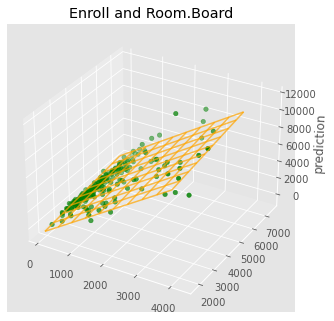

In [236]:
y_pred = y_pred_erb
drawPlane(model3, X_test_erb, y_test_erb, 'Enroll and Room.Board')

# Task 11: Sử dụng hồi quy tuyến tính với toàn bộ đặc trưng để quan sát tác động của từng đặc trưng đến mục tiêu

Tạo một bản sao về dữ liệu train và test

In [237]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

Điều chỉnh shape phù hợp với đầu vào của mô hình

In [238]:
y_train_copy = np.array(y_train_copy).reshape(-1,1)
y_test_copy = np.array(y_test_copy).reshape(-1,1)

Data scaling

In [239]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_test_scaled = scaler.transform(X_test_copy)

Xây dựng và huấn luyện mô hình

In [240]:
model4 = linear_model.LinearRegression()
model4.fit(X_train_scaled, y_train_copy)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [241]:
y_pred2 = model4.predict(X_test_scaled)
score = r2_score(y_test_copy, y_pred2)
score

0.919628527456307

Quan sát trọng số đối với từng đặc trưng để kiểm tra xem đặc trưng nào có tác động mạnh hơn tới số lượng sinh viên được chấp nhận

In [242]:
Z = model4.coef_

In [243]:
K = pd.DataFrame(Z.flatten(), X.columns, columns = ['Coefficients'])
K.sort_values(by=['Coefficients'], ascending=False)

Coefficients
Apps          1788.195579
Enroll        1166.094588
Outstate       271.437135
Top25perc      152.959466
Private         86.338167
PhD             86.299723
Terminal        16.690016
Books           -4.996008
Room.Board     -12.106168
Personal       -19.553777
Grad.Rate      -26.608065
S.F.Ratio      -36.078715
P.Undergrad    -57.395226
perc.alumni    -62.339947
F.Undergrad   -153.254558
Expend        -160.924662
Top10perc     -497.683550

#### Câu hỏi: Đặc trưng nào có tác động mạnh nhất đến số lượng sinh viên được chấp nhận ?
Đặc trưng có tác động mạnh nhất đến số lượng sinh viên được chấp nhận là Apps
#### Câu hỏi: Đặc trưng nào có tác động ít nhất đến số lượng sinh viên được chấp nhận ?
Đặc trưng có tác động ít nhất đến số lượng sinh viên được chấp nhận là Books

# Task 12: Xây dựng mô hình hồi quy tuyến tính của riêng bạn

In [244]:
# Phân tách dữ liệu đặc trưng với mục tiêu
X1 = df.drop(columns='Enroll')
y1 = df.Enroll

X1.head()

Private  Apps  Accept  Top10perc  Top25perc  \
Abilene Christian University        1  1660    1232         23         52   
Adelphi University                  1  2186    1924         16         29   
Adrian College                      1  1428    1097         22         50   
Agnes Scott College                 1   417     349         60         89   
Alaska Pacific University           1   193     146         16         44   

                              F.Undergrad  P.Undergrad  Outstate  Room.Board  \
Abilene Christian University         2885          537      7440        3300   
Adelphi University                   2683         1227     12280        6450   
Adrian College                       1036           99     11250        3750   
Agnes Scott College                   510           63     12960        5450   
Alaska Pacific University             249          869      7560        4120   

                              Books  Personal  PhD  Terminal  S.F.Ratio  \
Abilene Christian University    450      2200   70        78       18.1   
Adelphi University              750      1500   29        30       12.2   
Adrian College                  400      1165   53        66       12.9   
Agnes Scott College             450       875   92        97        7.7   
Alaska Pacific University       800      1500   76        72       11.9   

                              perc.alumni  Expend  Grad.Rate  
Abilene Christian University           12    7041         60  
Adelphi University                     16   10527         56  
Adrian College                         30    8735         54  
Agnes Scott College                    37   19016         59  
Alaska Pacific University               2   10922         15

In [245]:
# Tách dữ liệu thành train/test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7, random_state=7)

In [246]:
# Điều chỉnh shape phù hợp đầu vào mô hình
y1_train = np.array(y1_train).reshape(-1,1)
y1_test = np.array(y1_test).reshape(-1,1)

In [247]:
# Data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [248]:
# Xây dựng và huấn luyện mô hình
my_model = linear_model.LinearRegression()
my_model.fit(X1_train_scaled, y1_train)

LinearRegression()

In [249]:
# Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test
y1_pred = my_model.predict(X1_test_scaled)
score = r2_score(y1_test, y1_pred)
print('R2 score: ',score)

R2 score:  0.930820768774967


#### Câu hỏi: Hãy giải thích quá trình lý do lựa chọn đặc trưng, các tham số điều chỉnh để đạt được R2 score >= 0.9
Ở câu trước, ta đã xây dựng được mô hình hồi quy tuyến tính đa biến với mục tiêu là số lượng sinh viên được chấp nhận (Accept). Do mô hình này có R2 score > 0.9 nên theo ma trận tương quan, số lượng sinh viên mới đăng ký (Enroll) khá tương đồng với mục tiêu Accept nên nếu ta chọn Enroll làm mục tiêu cho 1 mô hình tuyến tính đa biến mới, khả năng cao ta cũng sẽ xây dựng được mô hình có R2 score >= 0.9. 

# Task 13: Sử dụng hồi quy Lasso để chọn ra đặc trưng tốt nhất để dự đoán số lượng sinh viên được chấp nhận

Yêu cầu: Tìm giá trị alpha sao cho mô hình đạt R2 score >= 0.92

In [250]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

X_sc = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, train_size=0.7, random_state=7)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model
lasso_cv = Lasso()

# Define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define parameters
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

# Define search
search = GridSearchCV(lasso_cv, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Execute search
result = search.fit(X_sc, y)

# Result
print('Best alpha: %s' % result.best_params_)

Best alpha: {'alpha': 10.0}


Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [251]:
model_ls = Lasso(alpha=10.0)

# Fitting the model
model_ls.fit(X_train, y_train)
y_pred = model_ls.predict(X_test)

# Model Predictions
score = r2_score(y_test, y_pred)
score

0.9215284499424126

Quan sát tham số với từng đặc trưng để kiểm tra xem đặc trưng nào bị loại bỏ bằng phương pháp Lasso

In [252]:
names = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [253]:
# Create a function called lasso,
def lasso(alphas):
 
    # Create an empty data frame
    df2 = pd.DataFrame()
    
    # Create a column of feature names
    df2['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
    # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df2[column_name] = lasso.coef_
        
    # Return the dataframe    
    return df2

In [256]:
lasso([1e-3, 1e-2, 1, 1e1, 1e2, 1e3, 1e4, 1e5])

Feature Name  Alpha = 0.001000  Alpha = 0.010000  Alpha = 1.000000  \
0       Private         73.670737         73.657389         72.093204   
1          Apps       1624.931926       1624.900350       1620.679436   
2        Enroll       1078.577652       1078.307463       1051.853964   
3     Top10perc       -487.510497       -487.408980       -476.137351   
4     Top25perc        182.977933        182.883147        172.554435   
5   F.Undergrad        -90.604839        -90.307241        -60.280219   
6   P.Undergrad        -51.238965        -51.240281        -51.280965   
7      Outstate        244.856005        244.822304        241.056806   
8    Room.Board        -13.102856        -13.071259         -9.450425   
9         Books          2.606060          2.591960          1.029551   
10     Personal        -30.801657        -30.793720        -29.913835   
11          PhD         76.370340         76.349458         73.949804   
12     Terminal          9.418829          9.411369          8.644988   
13    S.F.Ratio        -18.456043        -18.435876        -16.207636   
14  perc.alumni        -68.463333        -68.437221        -65.642256   
15       Expend       -154.052896       -154.027004       -151.187070   
16    Grad.Rate        -21.131085        -21.101137        -17.843739   

    Alpha = 10.000000  Alpha = 100.000000  Alpha = 1000.000000  \
0           48.967854           -0.000000            -0.000000   
1         1602.762596         1493.081183           943.347909   
2          979.160330          885.961594           434.239170   
3         -379.949141          -95.119584             0.000000   
4           88.920050           -0.000000             0.000000   
5            0.000000            0.000000             0.000000   
6          -33.861961            0.000000             0.000000   
7          214.830835            0.000000            -0.000000   
8            0.000000            0.000000             0.000000   
9            0.000000           -0.000000             0.000000   
10         -21.810725           -0.000000             0.000000   
11          55.261963            0.000000             0.000000   
12           7.546582            0.000000             0.000000   
13          -0.000000            0.000000             0.000000   
14         -43.315721           -0.000000            -0.000000   
15        -130.472564           -0.000000             0.000000   
16          -0.000000            0.000000             0.000000   

    Alpha = 10000.000000  Alpha = 100000.000000  
0                   -0.0                   -0.0  
1                    0.0                    0.0  
2                    0.0                    0.0  
3                    0.0                    0.0  
4                    0.0                    0.0  
5                    0.0                    0.0  
6                    0.0                    0.0  
7                   -0.0                   -0.0  
8                    0.0                    0.0  
9                    0.0                    0.0  
10                   0.0                    0.0  
11                   0.0                    0.0  
12                   0.0                    0.0  
13                   0.0                    0.0  
14                  -0.0                   -0.0  
15                   0.0                    0.0  
16                   0.0                    0.0

#### Câu hỏi: Đặc trưng nào bị loại bỏ trong hồi quy Lasso ?

Tại alpha = 10, các đặc trưng bị loại bỏ là F.Undergrad, Room.Board, Books, S.F.Ratio và Grad.Rate